# An Example of how to use Fitting package to fit data

In [1]:
import numpy as np

In [2]:
row_count=10000

def data_generation(dist_type, par, row_count):
    if dist_type== 'normal':
        mean, std = par
        data=np.random.normal(mean, std, row_count)
    
    elif dist_type== 'geometric':
        p= par
        data=np.random.geometric(p, row_count)  
       
    elif dist_type== 'binomial':
        n, p= par
        data=np.random.binomial(n, p, row_count)
    
    elif dist_type == 'poisson':
        l= par
        data = np.random.poisson(l, row_count)    
    
    elif dist_type== 'exponential':
        scale= par
        data=np.random.exponential(scale, row_count)
   
    elif dist_type == 'gamma':
        shape , scale = par
        data=np.random.gamma(shape, scale, row_count)
    
    elif dist_type == 'weibull': 
        a, b = par 
        # a= scale parameter b= shape 
        data=b*np.random.weibull(a, row_count) #this is one-parameter Weibull; for 2-D => multiply by b
    
    elif dist_type == 'uniform':
        a,b = par
        data = np.random.uniform(a, b, row_count)
        
    elif dist_type == 'bernoulli':
        a = par
        data = np.random.bernoulli(a, row_count)
    
    else:
        raise ValueError("Change distribution type or modify parameters")
        
    return data

row_count=10000

# Examples Using Fitting Class

In [3]:
import DistFit.distfit as dft

### 1) Bernoulli(0.3)

In [4]:
data = data_generation('binomial', (1, 0.3), row_count)

model = dft.Fitting(data)
a = model.bernoulli_fit()
print(a)

0.2996


In [5]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Bernoulli']


['Bernoulli']

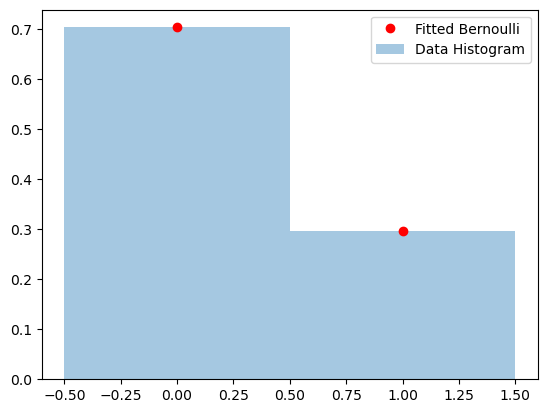

In [8]:
model.bernoulli_plot(a)

### 2) Binomial(10, .7)

In [6]:
data = data_generation('binomial', (10, 0.7), row_count)

model = dft.Fitting(data)
(n,p) = model.binomial_fit(n=10)
print(n,p)


Note: When estimating p with very rare events and a small n, using MLE estimator leads to p=0 which sometimes is unrealistic and undesirable. In such cases, use alternative estimators.


10 0.69975


In [7]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 10


['Binomial', 'Geometric', 'Poisson']

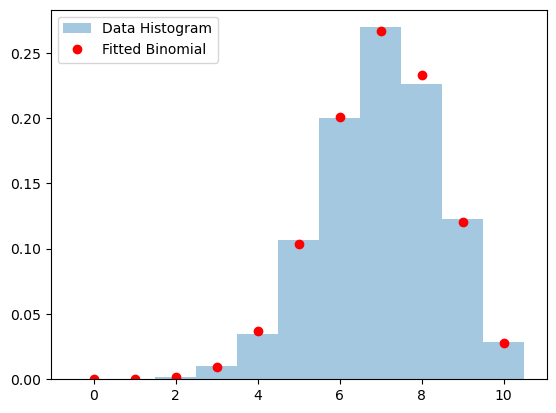

In [7]:
model.binomial_plot((n,p))

### 3) Geometric(0.42)

It seems MLE for geometric distribution is a rough estimate

In [9]:
data = data_generation('geometric', [0.42], row_count)

model = dft.Fitting(data)
p = model.geometric_fit()
print(p)

0.295630580027198


In [10]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 21


['Binomial', 'Geometric', 'Poisson']

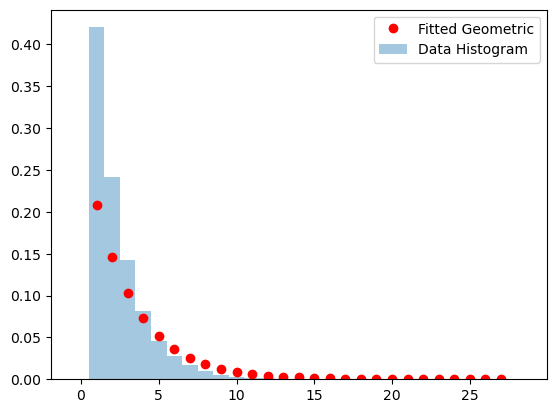

In [13]:
model.geometric_plot(p)

### 4) Poisson

In [15]:
data = data_generation('poisson', [7], row_count)

model = dft.Fitting(data)
p = model.poisson_fit()
print(p)

7.003


In [16]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Binomial', 'Geometric', 'Poisson']
If data are binomial, n is at least 21


['Binomial', 'Geometric', 'Poisson']

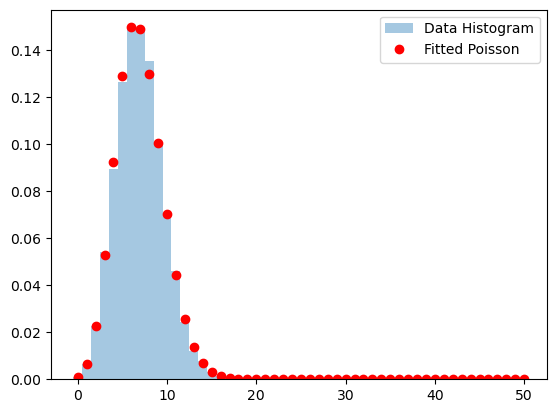

In [17]:
model.poisson_plot(p)

### 5) Uniform(2.3, 4.1)

In [8]:
data = data_generation('uniform', [2.4, 4.1], row_count)

model = dft.Fitting(data)
(a,b) = model.uniform_fit()
print(a,b)

2.4000729534272827 4.099827654185458


In [9]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Weibull', 'Gamma']

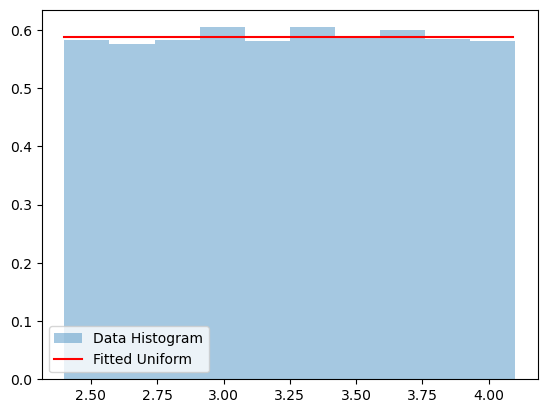

In [6]:
model.uniform_plot((a,b))

### 6) Exponential(0.35)

In [10]:
data = data_generation('exponential', [0.35], row_count)

model = dft.Fitting(data)
(a) = model.exponential_fit()
print(a)

0.3468617847358862


In [11]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Weibull', 'Gamma']

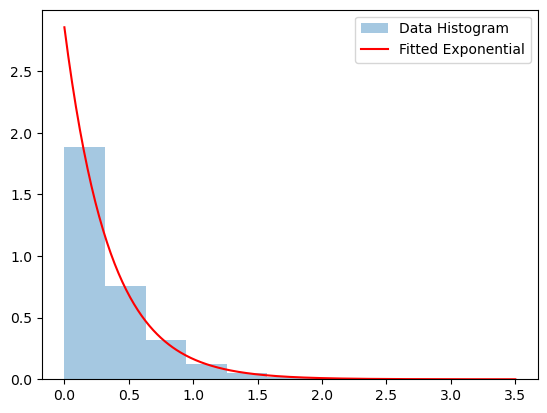

In [8]:
model.exponential_plot(a)

### 7) Normal(3,2)

In [12]:
data = data_generation('normal', (3,2), row_count)

model = dft.Fitting(data)
a,b = model.normal_fit()
print(a, b)

2.9980220524801653 2.0135990113646702


In [13]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Normal']


['Uniform', 'Normal']

#### GoF
Performing Goodness of Fit for Normal & Uniform

In [33]:
# Perform GoF
from scipy.stats import goodness_of_fit as gof
import scipy.stats

In [34]:
gof(dist=scipy.stats.norm, data=data, known_params=None, fit_params={'loc':a, 'scale':b}, guessed_params=None)

GoodnessOfFitResult(fit_result=  params: FitParams(loc=3.027238046501875, scale=2.004243494825721)
 success: True
 message: 'The fit was performed successfully.', statistic=0.6920102078584023, pvalue=0.0709, null_distribution=array([0.31331213, 0.35092277, 0.42675564, ..., 0.34044246, 0.42806255,
       0.19192935]))

In [38]:
a1,b1 = model.uniform_fit()
gof(dist=scipy.stats.uniform, data=data, known_params=None, fit_params={'loc':a1, 'scale':b1}, guessed_params=None)

GoodnessOfFitResult(fit_result=  params: FitParams(loc=-4.35544317585887, scale=11.089562399168333)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.', statistic=inf, pvalue=1.0, null_distribution=array([inf, inf, inf, ..., inf, inf, inf]))

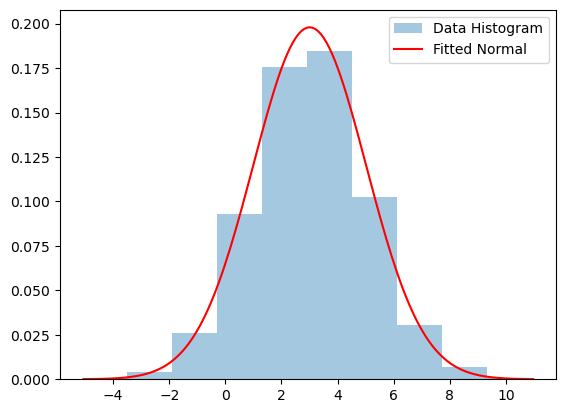

In [10]:
model.normal_plot(params=(a,b))

### 8) Weibull(2.1, 4.3)

In [14]:
data = data_generation('weibull', (2.1, 4.3), row_count)

model = dft.Fitting(data)
a,b = model.weibull_fit()
print(a, b)

2.0919867034118376 4.269614281841613


In [15]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Weibull', 'Gamma']

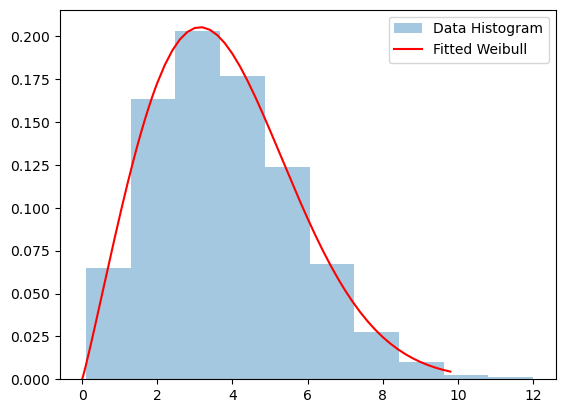

In [13]:
model.weibull_plot((a,b))

### 9) Gamma(3.1, 5.6)

In [16]:
data = data_generation('gamma', (3.1, 5.6), row_count)

model = dft.Fitting(data)
a,b = model.gamma_fit()
print(a, b)

3.1294751546778032 5.600464381113792


In [17]:
model.guess_distributions()

Note: only a limited number of distributions are considered in this library.

The possible distributions for the data are: ['Uniform', 'Exponential', 'Weibull', 'Gamma']


['Uniform', 'Exponential', 'Weibull', 'Gamma']

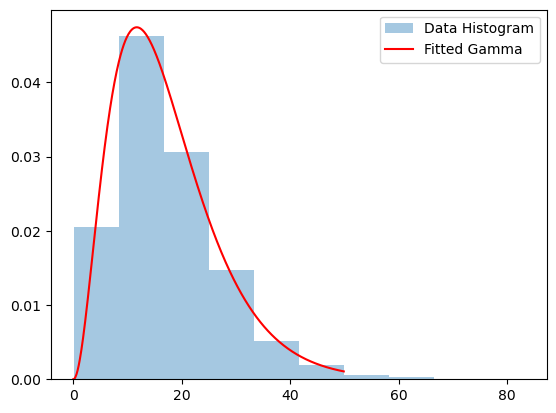

In [6]:
model.gamma_plot((a,b))